In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
pd.set_option('display.max_columns',50)
dados = load_breast_cancer()

In [13]:
dadosx = pd.DataFrame(dados.data, columns=[dados.feature_names])
#dadosx.head()
dadosx

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
dadosy = pd.Series(dados.target) #Carregamento dos resultados em forma de series, pois a seleção desta coluna atraves 
#do dataframe parece que nao é muito recomendado
dadosy.head(60)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    1
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    1
47    0
48    1
49    1
50    1
51    1
52    1
53    0
54    0
55    1
56    0
57    0
58    1
59    1
dtype: int32

In [7]:
#2022.04.26
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtreino, xteste, ytreino, yteste = train_test_split(dadosx, dadosy, test_size=0.3, random_state=9)
modelo = LogisticRegression(max_iter=300, solver='liblinear', penalty='l1', C=95)
modelo.fit(xtreino, ytreino)
modelo.score(xteste, yteste)

0.9766081871345029

In [12]:
xteste.shape

(171, 30)

In [8]:
predicao = modelo.predict(xteste)

In [9]:
from sklearn.metrics import confusion_matrix
confmatriz = confusion_matrix(yteste, predicao)
print(confmatriz)
yteste.shape

[[ 59   3]
 [  1 108]]


(171,)

In [10]:
predicoes = modelo.predict_proba(xteste)
print(predicoes)
predicoes.shape

[[8.26381917e-01 1.73618083e-01]
 [1.24836521e-01 8.75163479e-01]
 [1.00000000e+00 6.85130082e-15]
 [1.05897621e-01 8.94102379e-01]
 [2.51880201e-05 9.99974812e-01]
 [1.00000000e+00 2.24692433e-21]
 [1.00000000e+00 3.08076590e-15]
 [1.00000000e+00 2.64826032e-12]
 [3.64340057e-06 9.99996357e-01]
 [9.99999996e-01 4.22409034e-09]
 [1.00000000e+00 2.40377797e-14]
 [4.14685834e-05 9.99958531e-01]
 [2.84861875e-06 9.99997151e-01]
 [3.58046143e-05 9.99964195e-01]
 [9.99999932e-01 6.84122561e-08]
 [2.06494588e-02 9.79350541e-01]
 [2.87940744e-06 9.99997121e-01]
 [3.46830147e-02 9.65316985e-01]
 [1.10182403e-06 9.99998898e-01]
 [2.02196945e-07 9.99999798e-01]
 [1.00000000e+00 9.01371315e-36]
 [2.79180699e-07 9.99999721e-01]
 [9.60641505e-04 9.99039358e-01]
 [1.00000000e+00 9.05059173e-11]
 [1.61886379e-03 9.98381136e-01]
 [3.90134967e-03 9.96098650e-01]
 [1.59094481e-03 9.98409055e-01]
 [1.05278551e-08 9.99999989e-01]
 [2.47017428e-06 9.99997530e-01]
 [1.00000000e+00 2.37414406e-15]
 [1.000000

(171, 2)

In [11]:
predicoes2 = modelo.predict(xteste)
print(predicoes2)

[0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0
 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0
 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1]


In [14]:
predicoes2.shape

(171,)

In [23]:
probs = predicoes[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(yteste, probs)
print('fpr:',fpr)
print('tpr:',tpr)
print('thresholds:',thresholds)

fpr: [0.         0.         0.         0.03225806 0.03225806 0.0483871
 0.0483871  0.11290323 0.11290323 1.        ]
tpr: [0.         0.00917431 0.94495413 0.94495413 0.98165138 0.98165138
 0.99082569 0.99082569 1.         1.        ]
thresholds: [2.00000000e+00 9.99999997e-01 8.94018390e-01 8.75382539e-01
 7.01501622e-01 6.56209238e-01 6.17745254e-01 1.73137561e-01
 1.24025363e-01 1.45120129e-50]


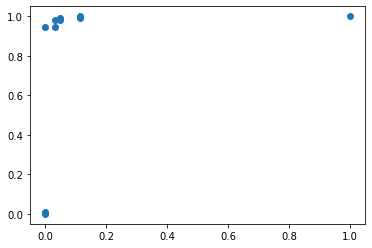

In [24]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)

In [25]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(yteste, probs))

0.9973364900858241
